In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import warnings
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import cv2
import os
warnings.filterwarnings('ignore')
for dirname, _, filenames in os.walk('./DATA'):
    for filename in filenames:
        print(os.path.join(dirname, filename)) #path



./DATA/.DS_Store
./DATA/test/.DS_Store
./DATA/test/NORMAL/IM-0031-0001.jpeg
./DATA/test/NORMAL/IM-0025-0001.jpeg
./DATA/test/NORMAL/NORMAL2-IM-0272-0001.jpeg
./DATA/test/NORMAL/NORMAL2-IM-0102-0001.jpeg
./DATA/test/NORMAL/NORMAL2-IM-0229-0001.jpeg
./DATA/test/NORMAL/NORMAL2-IM-0315-0001.jpeg
./DATA/test/NORMAL/NORMAL2-IM-0123-0001.jpeg
./DATA/test/NORMAL/NORMAL2-IM-0301-0001.jpeg
./DATA/test/NORMAL/NORMAL2-IM-0246-0001-0002.jpeg
./DATA/test/NORMAL/IM-0010-0001.jpeg
./DATA/test/NORMAL/IM-0046-0001.jpeg
./DATA/test/NORMAL/NORMAL2-IM-0357-0001.jpeg
./DATA/test/NORMAL/NORMAL2-IM-0027-0001.jpeg
./DATA/test/NORMAL/NORMAL2-IM-0033-0001.jpeg
./DATA/test/NORMAL/NORMAL2-IM-0343-0001.jpeg
./DATA/test/NORMAL/IM-0028-0001.jpeg
./DATA/test/NORMAL/NORMAL2-IM-0339-0001.jpeg
./DATA/test/NORMAL/NORMAL2-IM-0173-0001-0002.jpeg
./DATA/test/NORMAL/NORMAL2-IM-0012-0001.jpeg
./DATA/test/NORMAL/NORMAL2-IM-0362-0001.jpeg
./DATA/test/NORMAL/IM-0009-0001.jpeg
./DATA/test/NORMAL/NORMAL2-IM-0297-0001.jpeg
./DATA/te

In [ ]:
labels = ['ALVEOLI_INFECTION', 'NORMAL']
img_size = 150
def get_training_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE) #single channel
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)
    return np.array(data)

In [ ]:
import matplotlib.pyplot as plt
import PIL
from PIL import Image

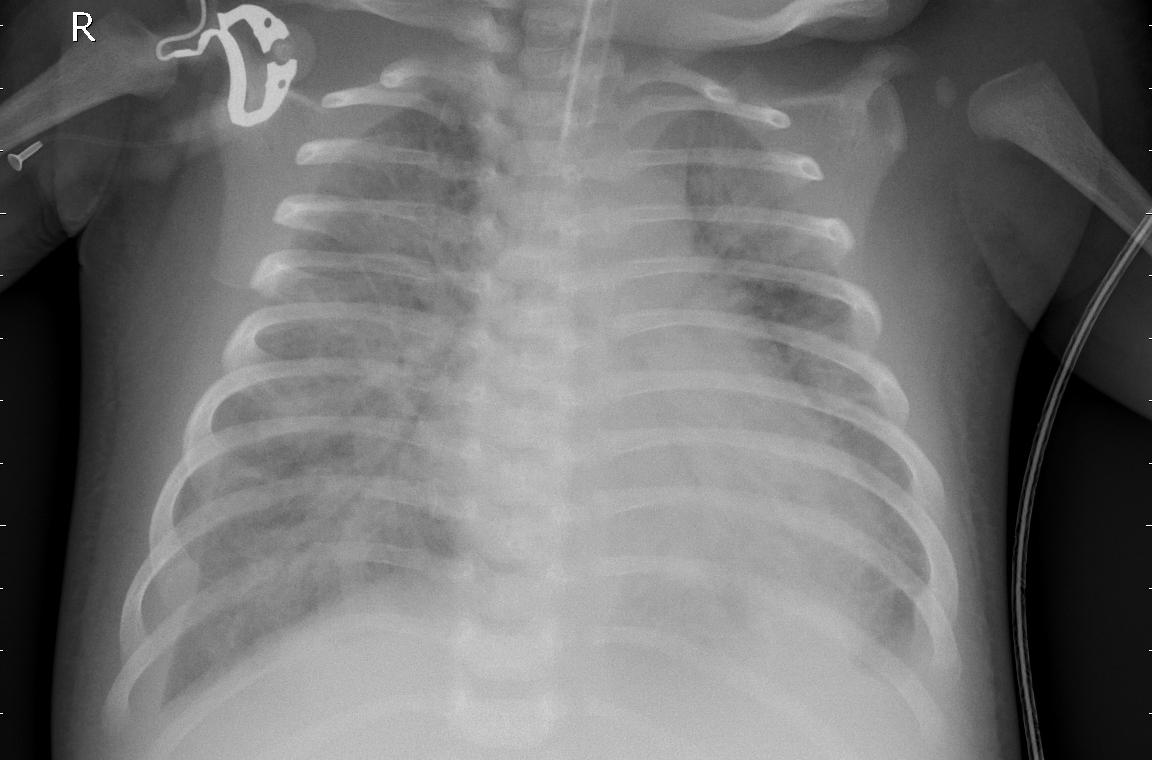

In [ ]:
image="./DATA/chest_xray/train/ALVEOLI_INFECTION/person1000_bacteria_2931.jpeg"
PIL.Image.open(image)

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
training_dir="./DATA/chest_xray/train"
training_generator=ImageDataGenerator(rescale=1/255,featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = False,  # randomly flip images
        vertical_flip=False)
train_generator=training_generator.flow_from_directory(training_dir,target_size=(200,200),batch_size=4,class_mode='binary')

Found 5216 images belonging to 2 classes.


In [ ]:
# 1.input 2.hidden 3.output

In [ ]:
validation_dir="./DATA/chest_xray/val"
validation_generator=ImageDataGenerator(rescale=1/255)
val_generator=validation_generator.flow_from_directory(validation_dir,target_size=(200,200),batch_size=4,class_mode='binary')

Found 16 images belonging to 2 classes.


In [ ]:
test_dir="./DATA/chest_xray/test"
test_generator=ImageDataGenerator(rescale=1/255)
test_generator=test_generator.flow_from_directory(test_dir,target_size=(200,200),batch_size=16,class_mode='binary')

Found 624 images belonging to 2 classes.


In [ ]:
train = get_training_data('./DATA/train')
test = get_training_data('./DATA/test')
val = get_training_data('./DATA/val')
print("Train",train.shape)
print("Test",test)
print("val",val)

Train (5216, 2)
Test [[array([[142, 198, 198, ..., 158, 172, 175],
         [ 31, 185, 195, ..., 155, 158, 165],
         [ 31, 203,  33, ..., 157, 167, 157],
         ...,
         [ 31,  23,  23, ...,  24,  24,  24],
         [ 25,  24,  23, ...,  24,  24,  24],
         [ 52,  25,  23, ...,  24,  25,  24]], dtype=uint8) 0]
 [array([[140,  90,  78, ..., 150, 154, 164],
         [144, 122,  76, ..., 130, 163, 177],
         [ 95,  98,  35, ..., 158, 172, 177],
         ...,
         [ 19,  19,  18, ...,  19,  19,  19],
         [ 19,  19,  18, ...,  20,  19,  19],
         [ 19,  19,  18, ...,  20,  19,  19]], dtype=uint8) 0]
 [array([[216, 219, 222, ..., 151, 160, 180],
         [212, 215, 211, ..., 176, 181, 164],
         [218, 222, 211, ..., 174, 181, 180],
         ...,
         [206, 204, 201, ...,  14,  14,  14],
         [204, 203, 203, ...,  15,  15,  15],
         [204, 204, 202, ...,  15,  15,  15]], dtype=uint8) 0]
 ...
 [array([[15, 14, 14, ...,  8, 10, 10],
         [14,

Text(0.5, 1.0, 'NORMAL')

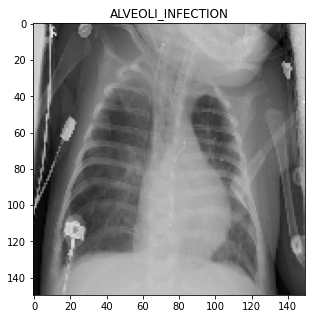

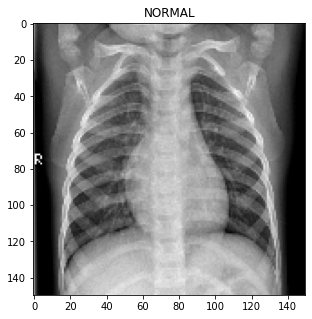

In [ ]:
plt.figure(figsize = (5,5))
plt.imshow(train[0][0], cmap='gray')
plt.title(labels[train[0][1]])

plt.figure(figsize = (5,5))
plt.imshow(train[-1][0], cmap='gray')
plt.title(labels[train[-1][1]])

In [ ]:
import tensorflow as tf
from tensorflow import keras # using keras with tensorflow backend
from keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Input
model= Sequential()

Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-04-20 17:29:41.165095: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-04-20 17:29:41.165903: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [ ]:

model=tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),input_shape=(200,200,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(256,(3,3),activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2), #feature extraction
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256,activation='relu'), #fully connected layer
    tf.keras.layers.Dense(1,activation='sigmoid') #output layer    
])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),loss='binary_crossentropy',metrics=['acc'])

In [ ]:
history = model.fit_generator(train_generator,validation_data = val_generator,epochs = 30,verbose = 1)
model.save('./models')

Epoch 1/30
1304/1304 [==============================] - 55s 42ms/step - loss: 0.4371 - acc: 0.8021 - val_loss: 0.3980 - val_acc: 0.8750
Epoch 2/30
   1/1304 [..............................] - ETA: 1:23 - loss: 0.0026 - acc: 1.0000

2022-04-20 17:31:35.637713: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1304/1304 [==============================] - 55s 42ms/step - loss: 0.3317 - acc: 0.8625 - val_loss: 0.3136 - val_acc: 0.8750
Epoch 3/30
1304/1304 [==============================] - 54s 41ms/step - loss: 0.2823 - acc: 0.8767 - val_loss: 0.4558 - val_acc: 0.8750
Epoch 4/30
1304/1304 [==============================] - 55s 42ms/step - loss: 0.2553 - acc: 0.8901 - val_loss: 0.4095 - val_acc: 0.8125
Epoch 5/30
1304/1304 [==============================] - 55s 42ms/step - loss: 0.2287 - acc: 0.9016 - val_loss: 0.5864 - val_acc: 0.7500
Epoch 6/30
1304/1304 [==============================] - 54s 42ms/step - loss: 0.2289 - acc: 0.9047 - val_loss: 0.6772 - val_acc: 0.6875
Epoch 7/30
1304/1304 [==============================] - 54s 41ms/step - loss: 0.2189 - acc: 0.9072 - val_loss: 0.4046 - val_acc: 0.8125
Epoch 8/30
1304/1304 [==============================] - 54s 42ms/step - loss: 0.2180 - acc: 0.9072 - val_loss: 0.2449 - val_acc: 0.9375
Epoch 9/30
1304/1304 [==============================] - 54s

<Figure size 432x288 with 0 Axes>

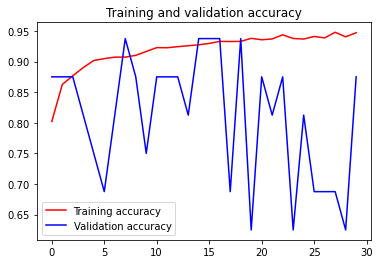

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

In [ ]:
print("Loss of the model is - " , model.evaluate(test_generator)[0]*100 , "%")
print("Accuracy of the model is - " , model.evaluate(test_generator)[1]*100 , "%")

39/39 [==============================] - 3s 78ms/step - loss: 0.2748 - acc: 0.8910
Loss of the model is -  27.478840947151184 %
39/39 [==============================] - 3s 73ms/step - loss: 0.2748 - acc: 0.8910
Accuracy of the model is -  89.10256624221802 %


In [ ]:
import tensorflow as tf
from keras.models import load_model
from keras.applications.vgg16 import preprocess_input
from keras import models
#model  = load_model('./models')

# model.save('chest_xray.h5')

In [ ]:
from keras.preprocessing import image
img=image.load_img('./DATA/chest_xray/train/ALVEOLI_INFECTION/person1460_virus_2507.jpeg',target_size=(200,200))

In [ ]:
import numpy as np
x=image.img_to_array(img)
x=np.expand_dims(x, axis=0)
img_data=preprocess_input(x)
classes=model.predict(img_data)
result=int(classes[0][0])

2022-04-20 17:58:44.386320: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [ ]:
print(result)
if result==0:
    print("Person is Affected By PNEUMONIA")
else:
    print("Result is Normal")

1
Result is Normal


In [ ]:
from tensorflow.keras.models import model_from_json
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
print(model_json)

{"class_name": "Sequential", "config": {"name": "sequential_1", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 200, 200, 3], "dtype": "float32", "sparse": false, "ragged": false, "name": "conv2d_input"}}, {"class_name": "Conv2D", "config": {"name": "conv2d", "trainable": true, "batch_input_shape": [null, 200, 200, 3], "dtype": "float32", "filters": 32, "kernel_size": [3, 3], "strides": [1, 1], "padding": "valid", "data_format": "channels_last", "dilation_rate": [1, 1], "groups": 1, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "MaxPooling2D", "config": {"name": "max_pooling2d", "trainable": true, "dtype": "float32", "pool_size": [2, 2], "padding": "valid", "strides": [2, 2

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 48, 48, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 128)      